In [1]:
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
#os.chdir("gdrive/My Drive/Colab Notebooks/Simple CNN Image Tutorial/")

#os.listdir('asl-alphabet/asl_alphabet_train/A/A1.jpg')
image = mpimg.imread('MyDataset/A/A1.jpg')
image = cv2.resize(image, (64,64))
plt.imshow(image)

In [2]:
import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import os                  # dealing with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.utils import np_utils
import matplotlib.image as mpimg

Using TensorFlow backend.


In [4]:
TRAIN_DIR = 'MyDataset'


x_data=[]
y_data=[]

c=-1
for i in os.listdir(TRAIN_DIR):
    directory=TRAIN_DIR + "/" + str(i)
    print(i)
    if(i not in ['A','B','C','L','O','nothing']):
        continue
    c+=1
    for img in tqdm(os.listdir(directory)):
        #print(img)
        path = os.path.join(directory,img)
        image = mpimg.imread(path)
        image = cv2.resize(image, (128,128))
        x_data.append(image)
        y_data.append(i)

A


100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:06<00:00, 478.68it/s]


B


100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:08<00:00, 342.65it/s]


C


100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:13<00:00, 228.36it/s]


del
G
L


100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:13<00:00, 214.97it/s]


nothing


 22%|█████████████████▍                                                            | 673/3000 [00:03<00:12, 180.78it/s]


KeyboardInterrupt: 

In [3]:
x_data[0].shape

NameError: name 'x_data' is not defined

In [ ]:
np.save("x_data.npy",np.array(x_data))
np.save("y_data.npy",np.array(y_data))

np.array(y_data).shape
#plt.imshow(x_data[600])
y_data[15000]

'A'

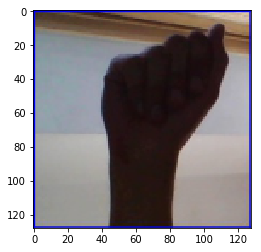

In [3]:
x=np.load("x_data.npy")
y=np.load("y_data.npy")
x.shape
os.listdir('.')
x_data=x
y_data=y
plt.imshow(x_data[1001])
y_data[1001]

In [ ]:
# Making sure that the values are float so that we can get decimal points after division
x_data_float = x_data.astype('float32')
x_data_float /= 255

In [ ]:
np.save("x_data_float_224.npy",np.array(x_data_float))

In [4]:
x_data.shape

(30000, 128, 128, 3)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size=0.01)

#plt.imshow(X_train[17])

In [6]:
from keras.utils import np_utils

lb = LabelEncoder()

Y_train = np_utils.to_categorical(lb.fit_transform(Y_train))
Y_test = np_utils.to_categorical(lb.fit_transform(Y_test))

Y_train[17]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

['B']


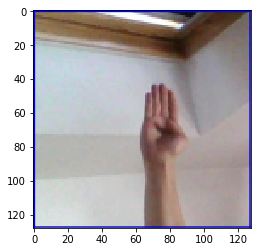

In [7]:
i=2000

output=Y_train[i].argmax()
abc=output.astype(int).flatten()
livepredictions = (lb.inverse_transform((abc)))
print(livepredictions)

plt.imshow(X_train[i])

In [8]:
X_train = X_train.reshape(X_train.shape[0], 128, 128, 3)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 3)
input_shape = (128, 128, 3)
# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
X_train /= 255
X_test /= 255
print('x_train shape:', X_train.shape)
print('Number of images in x_train', X_train.shape[0])
print('Number of images in x_test', X_test.shape[0])

x_train shape: (29700, 128, 128, 3)
Number of images in x_train 29700
Number of images in x_test 300


In [9]:
# Importing the required Keras modules containing model and layers
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, Conv2D
#from keras.utils import np_utils
from keras import backend as K
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import keras

#from keras.utils import np_utils

batch_size = 32
nb_classes = 10
nb_epoch = 10

# input image dimensions
img_rows, img_cols = 128, 128
# number of convolutional filters to use
nb_filters = 64
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

cnn_model1 = Sequential()
cnn_model1.add(Conv2D(64, kernel_size=4, strides=1, activation='relu', input_shape=(128,128,3)))
cnn_model1.add(Conv2D(64, kernel_size=4, strides=2, activation='relu'))
cnn_model1.add(Dropout(0.5))
cnn_model1.add(Conv2D(128, kernel_size=4, strides=1, activation='relu'))
cnn_model1.add(Conv2D(128, kernel_size=4, strides=2, activation='relu'))
cnn_model1.add(Dropout(0.5))
cnn_model1.add(Conv2D(256, kernel_size=4, strides=1, activation='relu'))
cnn_model1.add(Conv2D(256, kernel_size=4, strides=2, activation='relu'))
cnn_model1.add(Flatten())
cnn_model1.add(Dropout(0.5))
cnn_model1.add(Dense(512, activation='relu'))
cnn_model1.add(Dense(10, activation='softmax'))
'''
cnn_model1 = Sequential()
cnn_model1.add(Convolution2D(64, kernel_size[0], kernel_size[1], border_mode='valid', input_shape=(img_rows, img_cols, 3)))
cnn_model1.add(Activation('relu'))
cnn_model1.add(MaxPooling2D(pool_size=pool_size))
cnn_model1.add(Dropout(0.2))
cnn_model1.add(Convolution2D(64, kernel_size[0], kernel_size[1], border_mode='valid'))
cnn_model1.add(Activation('relu'))
cnn_model1.add(MaxPooling2D(pool_size=pool_size))
cnn_model1.add(Dropout(0.2))
cnn_model1.add(Convolution2D(64, kernel_size[0], kernel_size[1], border_mode='valid'))
cnn_model1.add(Activation('relu'))
cnn_model1.add(MaxPooling2D(pool_size=pool_size))
cnn_model1.add(Dropout(0.2))
cnn_model1.add(Convolution2D(64, kernel_size[0], kernel_size[1], border_mode='valid'))
cnn_model1.add(Activation('relu'))
cnn_model1.add(MaxPooling2D(pool_size=pool_size))
cnn_model1.add(Dropout(0.2))
cnn_model1.add(Convolution2D(64, kernel_size[0], kernel_size[1], border_mode='valid'))
cnn_model1.add(Activation('relu'))
cnn_model1.add(MaxPooling2D(pool_size=pool_size))
cnn_model1.add(Dropout(0.2))
cnn_model1.add(Flatten())
cnn_model1.add(Dense(128))
cnn_model1.add(Activation('relu'))
cnn_model1.add(Dense(70))
cnn_model1.add(Activation('relu'))
cnn_model1.add(Dense(10))
cnn_model1.add(Activation('softmax'))
'''

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


"\ncnn_model1 = Sequential()\ncnn_model1.add(Convolution2D(64, kernel_size[0], kernel_size[1], border_mode='valid', input_shape=(img_rows, img_cols, 3)))\ncnn_model1.add(Activation('relu'))\ncnn_model1.add(MaxPooling2D(pool_size=pool_size))\ncnn_model1.add(Dropout(0.2))\ncnn_model1.add(Convolution2D(64, kernel_size[0], kernel_size[1], border_mode='valid'))\ncnn_model1.add(Activation('relu'))\ncnn_model1.add(MaxPooling2D(pool_size=pool_size))\ncnn_model1.add(Dropout(0.2))\ncnn_model1.add(Convolution2D(64, kernel_size[0], kernel_size[1], border_mode='valid'))\ncnn_model1.add(Activation('relu'))\ncnn_model1.add(MaxPooling2D(pool_size=pool_size))\ncnn_model1.add(Dropout(0.2))\ncnn_model1.add(Convolution2D(64, kernel_size[0], kernel_size[1], border_mode='valid'))\ncnn_model1.add(Activation('relu'))\ncnn_model1.add(MaxPooling2D(pool_size=pool_size))\ncnn_model1.add(Dropout(0.2))\ncnn_model1.add(Convolution2D(64, kernel_size[0], kernel_size[1], border_mode='valid'))\ncnn_model1.add(Activation

In [ ]:
cnn_model1.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
#X_train.shape
cnn_model1.summary()

In [ ]:
cnn_model1.fit(X_train, Y_train, validation_split=0.05, nb_epoch=15, batch_size=batch_size, verbose=1)

In [ ]:
cnn_model1.evaluate(X_test, Y_test)
#plt.imshow(X_test[2],cmap=plt.get_cmap('gray'))

In [ ]:
from keras.models import load_model

cnn_model1.save('kev_model.h5')  


In [10]:
from keras.models import load_model
model = load_model('colab_model_5_layers_10_classes_128_256_512_1024_1024.h5')
model.summary()

Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 126, 126, 128)     3584      
_________________________________________________________________
activation_52 (Activation)   (None, 126, 126, 128)     0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 63, 63, 128)       0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 61, 61, 256)       295168    
_________________________________________________________________
activation_53 (Activation)   (None, 61, 61, 256)       0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling

In [11]:
model.evaluate(X_test, Y_test)

300/300 [==============================] - ETA: 24 - ETA: 20 - ETA: 17 - ETA: 14 - ETA: 11 - ETA: 9 - ETA:  - ETA:  - ETA:  - 25s 83ms/step


[0.012027554813151558, 0.9966666666666667]

['A']


'\noutput=Y_train[70003].argmax()\nabc=output.astype(int).flatten()\nlivepredictions = (lb.inverse_transform((abc)))\nprint(livepredictions)\n'

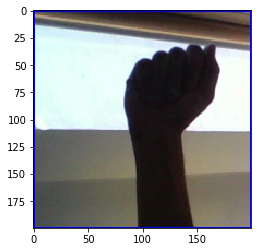

In [14]:
image=mpimg.imread('asl-alphabet/asl_alphabet_test/A_test.jpg')
test=cv2.resize(image,(128,128))
test = test.astype('float32')
test /=255
#plt.imshow(image)
pred=model.predict(test.reshape(1,128,128,3))
plt.imshow(image)
output=pred.argmax()
abc=output.astype(int).flatten()
livepredictions = (lb.inverse_transform((abc)))
print(livepredictions)
'''
output=Y_train[70003].argmax()
abc=output.astype(int).flatten()
livepredictions = (lb.inverse_transform((abc)))
print(livepredictions)
'''

In [32]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import queue

L = queue.Queue(maxsize=5) 
L.put(-1) 
L.put(-2) 
L.put(-3) 
L.put(-4) 
L.put(-5)  

cap = cv2.VideoCapture(0)

# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")

photo=0
o=-1
#print(model.summary())
prev = -1
while True:
    ret, frame = cap.read()
    bright = cv2.resize(frame, None, fx=0.5, fy=0.667, interpolation=cv2.INTER_AREA)
    #bright = cv2.flip(frame,1)
    bright = cv2.rectangle(bright,(400,100),(624,324),(0,255,0),3) 
    img1=bright[100:324,400:624]   #pridint on img1 only not bright 
    cv2.imshow('Input',bright)
    test=cv2.resize(img1, (128,128))
    #test = test.astype('float32')
    #test /=255
    #cv2.imshow('Input',test)
    pred=model.predict(test.reshape(1,128,128,3))
    
    out=pred.argmax()
    
    L.get()
    L.put(out)
    
    '''
    if(op!=prev):
        abc=op.astype(int).flatten()
        livepredictions = (lb.inverse_transform((abc)))
        print(livepredictions)
        prev=op
    
    '''
    
    if len(set((list(L.queue))))==1 :
        
            op = list(set((list(L.queue))))[0]
            if(op!=prev):

                abc=op.astype(int).flatten()
                livepredictions = (lb.inverse_transform((abc)))
                print(livepredictions)
                prev=op
    
    c = cv2.waitKey(1)
    if c == 27:
        break
        
cap.release()
cv2.destroyAllWindows()
bright.shape
plt.imshow(test)

error: OpenCV(4.0.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
import numpy as np
import cv2
#import util as ut

cap = cv2.VideoCapture(0)
o=-1

while(cap.isOpened()):
    # Capture frame-by-frame
    ret, img = cap.read() 

    #print(frame.rows)

    # Our operations on the frame come here
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    img=cv2.flip(img,1)
    img = cv2.rectangle(img,(400,100),(620,300),(0,255,0),3) #top left coordinates, bottom right coordinates, aestetics 
    img1=img[100:300,400:620]
    #img1=img
    img_ycrcb = cv2.cvtColor(img1, cv2.COLOR_BGR2YCR_CB)
    blur = cv2.GaussianBlur(img_ycrcb,(11,11),0)
    skin_ycrcb_min = np.array((0, 138, 67))
    skin_ycrcb_max = np.array((255, 173, 133))
    mask = cv2.inRange(blur, skin_ycrcb_min, skin_ycrcb_max)  # detecting the hand in the bounding box using skin detection
    resultBGR = cv2.bitwise_and(img1, img1, mask = mask)

    toPredict =  cv2.resize(resultBGR, (128,128))
    print(toPredict.shape)
    
    #print(toPredict.shape)
    
    
    contours,hierarchy = cv2.findContours(mask.copy(),cv2.RETR_EXTERNAL, 2)
    #cnt=ut.getMaxContour(contours,4000)
    	
        
    font                   = cv2.FONT_HERSHEY_SIMPLEX
    bottomLeftCornerOfText = (100,400)
    fontScale              = 1
    fontColor              = (255,255,255)
    lineType               = 2

    
    
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
    pred = model.predict(toPredict.reshape(1,28, 28, 1))
    #print(pred.argmax())
    
    prev_o=o
    o=pred.argmax()
    
    if(o!=prev_o):
        print(o)
    
    letter=alph[o]
        
    cv2.putText(img,letter,bottomLeftCornerOfText,font,fontScale,fontColor,lineType)

    cv2.imshow('img',img)
    cv2.imwrite("out.jpg", img)

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()